In [5]:
import pandas as pd
import numpy as np
import re 
import csv
import os
import glob
import zipfile

In [16]:
data_old = pd.read_excel('C:\\Users\\anchi\\Downloads\\UKY\\Research\\PretermBabyDataAndCode\\Data\\ROPAIprojectcombinedFINAL3-10-21ea.xlsx', usecols = ["Birth weight", "GA", "Sex", "Race & Ethinicity ", "SGA %", "Multiple Gestation", "Prenatal Steroids", "Cesarean Section" ], header =0, engine = 'openpyxl')

In [17]:
data_old

,GA,Birth weight,Race & Ethinicity,Sex,SGA %,Prenatal Steroids,Cesarean Section,Multiple Gestation
0,(Weeks),(gm),NaN,NaN,NaN,NaN,NaN,Yes/No
1,26,1100,Non- Hispanic/ White,M,94.0,0.0,0.0,0
2,27,1080,Non- Hispanic/ White,M,65.0,1.0,0.0,0
3,26,1021,Non- Hispanic/ White,M,75.0,0.0,0.0,1
4,26,1000,Non- Hispanic/ White,M,71.0,0.0,0.0,1
5,25,640,Non- Hispanic/ White,F,25.0,1.0,0.0,1
6,29,1380,Non- Hispanic/ White,M,59.0,1.0,0.0,0
7,32,1300,Non- Hispanic/ White,M,5.0,0.0,1.0,0
8,34,1960,Non- Hispanic/ White,F,28.0,0.0,1.0,0
9,27,940,Non- Hispanic/ White,F,52.0,1.0,1.0,0


In [2]:
cd "C:\Users\anchi\Downloads\UKY\Research\PretermBabyDataAndCode\Data\New_Data"

C:\Users\anchi\Downloads\UKY\Research\PretermBabyDataAndCode\Data\New_Data


In [6]:
folders = sorted(glob.glob('*.xlsx'))
folders

['IH0001 Clean_Dur_001_99999_Day.xlsx',
 'IH0002 Clean_Dur_001_99999_Day.xlsx',
 'IH0003 Clean_Dur_001_99999_Day.xlsx',
 'IH0004 Clean_Dur_001_99999_Day.xlsx',
 'IH0005 Clean_Dur_001_99999_Day.xlsx',
 'IH0006 Clean_Dur_001_99999_Day.xlsx',
 'IH0007 Clean_Dur_001_99999_Day.xlsx',
 'IH0008 Clean_Dur_001_99999_Day.xlsx',
 'IH0009 Clean_Dur_001_99999_Day.xlsx',
 'IH0010 Clean_Dur_001_99999_Day.xlsx',
 'IH0011 Clean_Dur_001_99999_Day.xlsx',
 'IH0012 Clean_Dur_001_99999_Day.xlsx',
 'IH0013 Clean_Dur_001_99999_Day.xlsx',
 'IH0014 Clean_Dur_001_99999_Day.xlsx',
 'IH0015 Clean_Dur_001_99999_Day.xlsx',
 'IH0016 Clean_Dur_001_99999_Day.xlsx',
 'IH0017 Clean_Dur_001_99999_Day.xlsx',
 'IH0018 Clean_Dur_001_99999_Day.xlsx',
 'IH0019 Clean_Dur_001_99999_Day.xlsx',
 'IH0020 Clean_Dur_001_99999_Day.xlsx',
 'IH0021 Clean_Dur_001_99999_Day.xlsx',
 'IH0022 Clean_Dur_001_99999_Day.xlsx',
 'IH0023 Clean_Dur_001_99999_Day.xlsx',
 'IH0024 Clean_Dur_001_99999_Day.xlsx',
 'IH0025 Clean_Dur_001_99999_Day.xlsx',


##  Method 1

Loading the data

In [112]:
appended_data = []
for file in folders:
   # print("Working on" + file)
    data = pd.read_excel(file,sheet_name="overall_data", header=0, usecols ="BB", nrows=10, engine='openpyxl')
   # print("data read")
    dataframe2 = data.loc[:, ['estimated #events<80%']]
    dataframe2_transposed = dataframe2.transpose()
    # store DataFrame in list
    appended_data.append(dataframe2_transposed)
   # print("print dataframe created and appended")
print("done")
#appended_data = pd.concat(appended_data)
# write DataFrame to an excel sheet 
#print(appended_data)

done


Counting Single Day and Day Sequence

In [117]:
# Valid Data sequences from a given day to Day 10.

count_single_day = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_day_sequence = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

count = 0

for j in range(10):
    for i in range(len(appended_data)):

        if len(appended_data[i].values[0]) == 10:
            count = count + 1
            # print("index" + str(i))
            if not(np.isnan(appended_data[i].values[0][j]) or appended_data[i].values[0][j] == 0.0):
                count_single_day[j] = count_single_day[j] + 1

end = 9
for start in range(9):
    for i in range(len(appended_data)):

        if len(appended_data[i].values[0]) == 10:
            # print("index" + str(i))
            j = start
            bool = True
            while(j <= end):
                if np.isnan(appended_data[i].values[0][j]) or appended_data[i].values[0][j] == 0:
                    bool = False
                    break
                j = j+1
            
            if bool == True:
                count_day_sequence[start] = count_day_sequence[start] + 1
                
            
    
    
        
print(count_single_day)
print(count_day_sequence)
print(count)

    
    

[14, 67, 115, 147, 160, 167, 170, 176, 178, 184]
[9, 48, 85, 112, 126, 135, 148, 159, 172, 0]
2160


Day Sequence for variable Number of days

In [254]:
# Valid Data sequences from a given day to Day 10, for a variable sequence length

count_single_day = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_day_sequence = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for j in range(10):
    for i in range(len(appended_data)):

        if len(appended_data[i].values[0]) == 10:
            # print("index" + str(i))
            if not(np.isnan(appended_data[i].values[0][j]) or appended_data[i].values[0][j] == 0):
                count_single_day[j] = count_single_day[j] + 1

end = 9
for start in range(9):
    for i in range(len(appended_data)):
        
        count = 1
        bool = True

        if len(appended_data[i].values[0]) == 10:
            # print("index" + str(i))
            if np.isnan(appended_data[i].values[0][start]) or appended_data[i].values[0][start] == 0:
                bool = False
                
            j = start+1
            while(j <= end and bool == True):
                if not(np.isnan(appended_data[i].values[0][j]) or appended_data[i].values[0][j] == 0):
                    count = count + 1
                j = j+1
            
            if count >= 2:
                count_day_sequence[start] = count_day_sequence[start] + 1
                
            
    
    
        
print(count_single_day)
print(count_day_sequence)

    
    

[14, 67, 115, 147, 160, 167, 170, 176, 178, 184]
[14, 67, 115, 145, 159, 164, 167, 170, 172, 0]


## Method 2

Loading the data

In [102]:
appended_data2 = []
for file in folders:
    #print("Working on" + file)
    data = pd.read_excel(file,sheet_name="overall_data", header=0, usecols ="L, AA, BB", nrows=10, engine='openpyxl')
    #print("data read")
    dataframe = data.loc[:, ['average_duration<80%','corrected %time<80%' , 'estimated #events<80%']]
    dataframe2_transposed = dataframe2.transpose()
    # store DataFrame in list
    appended_data2.append(dataframe2_transposed)
    #print("print dataframe created and appended")
print("done")
appended_data2 = pd.concat(appended_data2)
# write DataFrame to an excel sheet 

done


Valid Data sequences from a given day to Day 10.

In [314]:
# # Valid Data sequences from a given day to Day 10.
count_single_day_nonROP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_day_sequence_nonROP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_single_day_ROP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_day_sequence_ROP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ROP_indexes = [27, 28,47, 48, 52, 55, 61, 66, 69, 74, 87, 92, 117, 128, 134, 138, 139, 142, 150, 157, 158, 162, 164, 175, 180, 182, 185, 193, 195, 196, 200]

for j in range(10):
    for i in range(len(appended_data2)):

        if len(appended_data2.values[i]) == 10:
            # print("index" + str(i))
            if not(np.isnan(appended_data2.values[i][j]) or appended_data2.values[i][j] == 0) :
                if i not in ROP_indexes:
                    count_single_day_nonROP[j] = count_single_day_nonROP[j] + 1
                else:
                    count_single_day_ROP[j] = count_single_day_ROP[j] + 1
                    

end = 9
for start in range(9):
    for i in range(len(appended_data2)):

        if len(appended_data2.values[i]) == 10:
            # print("index" + str(i))
            j = start
            bool = True
            while(j <= end):
                if np.isnan(appended_data2.values[i][j]) or appended_data2.values[i][j] == 0:
                    bool = False
                    break
                j = j+1
            
            if bool == True:
                if i not in ROP_indexes:
                    count_day_sequence_nonROP[start] = count_day_sequence_nonROP[start] + 1
                else:
                    count_day_sequence_ROP[start] = count_day_sequence_ROP[start] + 1
                    
                
            
    
    
        
print(count_single_day_nonROP)
print(count_single_day_ROP)
print(count_day_sequence_nonROP)
print(count_day_sequence_ROP)

    
    

[14, 61, 107, 132, 144, 150, 150, 155, 155, 158]
[0, 7, 12, 21, 23, 23, 24, 24, 25, 26]
[9, 43, 76, 94, 105, 113, 125, 135, 147, 0]
[0, 5, 9, 18, 21, 22, 23, 24, 25, 0]


Valid Data for atleast n counts

In [357]:
# # Valid Data for atleast n counts
count_single_day_nonROP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_single_day_ROP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count_day_sequence_nonROP = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
count_day_sequence_ROP = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

ROP_indexes = [27, 28,47, 48, 52, 55, 61, 66, 69, 74, 87, 92, 117, 128, 134, 138, 139, 142, 150, 157, 158, 162, 164, 175, 180, 182, 185, 193, 195, 196, 200]

for j in range(10):
    for i in range(len(appended_data2)):

        if len(appended_data2.values[i]) == 10:
            # print("index" + str(i))
            if not(np.isnan(appended_data2.values[i][j]) or appended_data2.values[i][j] == 0):
                if i not in ROP_indexes:
                    count_single_day_nonROP[j] = count_single_day_nonROP[j] + 1
                else:
                    count_single_day_ROP[j] = count_single_day_ROP[j] + 1

end = 9
for start in range(9):
    
    for i in range(len(appended_data2)):
        count = 1
        bool = True
        if len(appended_data2.values[i]) == 10:
            # print("index" + str(i))
            if np.isnan(appended_data2.values[i][start]) or appended_data2.values[i][start] == 0:
                bool = False
            
            j = start + 1
            while(j <= end and bool == True):
                if not(np.isnan(appended_data2.values[i][j]) or appended_data2.values[i][j] == 0):
                    count = count + 1
                    
                j = j+1
            print(count)
            if(count>9):
                count = 9
            while(count -2 >=0):
                if i not in ROP_indexes:
                    count_day_sequence_nonROP[count-2][start] = count_day_sequence_nonROP[count-2][start] + 1
                else:
                    count_day_sequence_ROP[count-2][start] = count_day_sequence_ROP[count-2][start] + 1
                count = count - 1
                
            
    
    
        
print(count_single_day_nonROP)
print(count_single_day_ROP)
print(count_day_sequence_nonROP)
print(count_day_sequence_ROP)

    
    

10
10
1
1
1
1
1
1
5
1
1
1
1
1
1
1
4
1
10
10
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
1
1
1
1
10
1
1
1
10
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
9
1
1
1
1
1
1
4
1
1
1
1
1
1
1
3
9
9
9
1
9
1
1
8
9
1
3
1
1
9
1
1
9
7
1
1
9
8
9
9
1
1
1
9
1
6
9
9
8
1
1
9
1
1
1
9
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
9
1
9
8
9
1
1
9
1
1
9
1
6
1
1
9
9
1
9
9
9
1
1
1
8
8
1
9
1
1
1
1
1
1
1
1
1
1
9
9
8
7
1
6
1
1
1
1
1
1
1
9
1
9
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
9
1
1
1
1
8
1
1
1
9
9
1
1
1
1
8
1
1
9
1
1
1
1
1
1
9
1
1
1
1
1
1
1
9
1
1
1
9
8
9
9
9
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
9
1
1
1
1
9
1
1
1
1
1
9
1
8
8
1
7
2
1
5
1
3
1
8
8
8
1
8
7
2
8
8
8
1
8
1
6
7
8
1
2
1
1
8
7
1
8
6
8
6
8
7
8
8
1
8
1
8
8
5
8
8
7

# Count Data Visualization

Single Day count

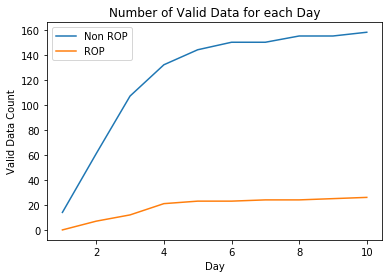

In [316]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, count_single_day_nonROP, label = 'Non ROP' )
plt.plot(x, count_single_day_ROP, label = "ROP")
plt.xlabel('Day')
plt.ylabel('Valid Data Count')
plt.title('Number of Valid Data for each Day')
plt.legend()
plt.show()


Sequence Day with atleast n days data

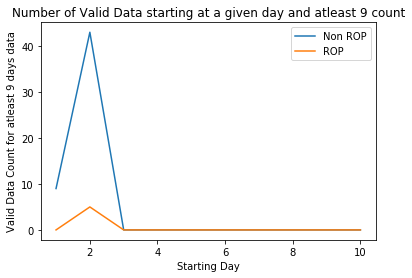

In [338]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, count_day_sequence_nonROP, label = 'Non ROP' )
plt.plot(x, count_day_sequence_ROP, label = "ROP")
plt.xlabel('Starting Day')
plt.ylabel('Valid Data Count for atleast 9 days data')
plt.title('Number of Valid Data starting at a given day and atleast 9 count')
plt.legend()
plt.show()

Cumulative plot with varying minimum days

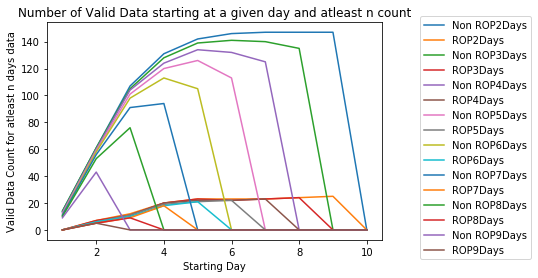

In [369]:
import matplotlib 
x = [1,2,3,4,5,6,7,8,9,10]
for i in range(8):
    plt.plot(x, count_day_sequence_nonROP[i], label = 'Non ROP' +str(i+2) +'Days')
    plt.plot(x, count_day_sequence_ROP[i], label = 'ROP' + str(i+2) +'Days')
plt.xlabel('Starting Day')
plt.ylabel('Valid Data Count for atleast n days data')
plt.title('Number of Valid Data starting at a given day and atleast n count')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# Dataset for combination of days

In [429]:
ROP_GroundTRuth = np.zeros(223).tolist()
for i in range(len(ROP_GroundTRuth)):
    if i in ROP_indexes:
        ROP_GroundTRuth[i] = 1
    

In [430]:
ROP_GroundTRuth

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 0.0,
 0.0,
 0.0,
 1,
 0.0,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [432]:
experiment_data1_transpose_df.insert(loc = 4, column = 4, value = ROP_GroundTRuth)

In [444]:
#counting number of valid ROPS and non ROP's for Day5,6,7,8
count_valid_ROP = 0
count_valid_NONROP = 0
sequence = 4
for i in range(len(experiment_data1_transpose_df)):
    j = 0
    bool = True
    while(j<sequence):
        if np.isnan(experiment_data1_transpose_df.values[i][j]) or experiment_data1_transpose_df.values[i][j] == 0:
            bool = False
        j = j + 1
    if bool == True:
        if i in ROP_indexes:
            count_valid_ROP = count_valid_ROP + 1
        else:
            count_valid_NONROP = count_valid_NONROP + 1

print(count_valid_ROP)
print(count_valid_NONROP)
            
            
            
    

21
118


# Logistic Regression example on IRIS Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(random_state=0).fit(X, y)

In [211]:
#iris dataset

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [212]:
X, y = load_iris(return_X_y = True)

In [11]:
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\anchi\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anchi\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
clf.predict(X[:2, :])

array([0, 0])

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Classification Experiments

Create dataset for training regression model

In [208]:
# create dataset for training regression model
i = 0
ROP_indexes = [27, 28,47, 48, 52, 55, 61, 66, 69, 74, 87, 92, 117, 128, 134, 138, 139, 142, 150, 157, 158, 162, 164, 175, 180, 182, 185, 193, 195, 196, 200]
for file in folders:
    data = pd.read_excel(file,sheet_name="overall_data", header=0, usecols ="L, AA, BB", nrows=10, engine='openpyxl')
    dataframe_avg_dur = data.loc[:, ['average_duration<80%' ]]
    dataframe_corr_time = data.loc[:, ['corrected %time<80%']]
    dataframe_est_events = data.loc[:, ['estimated #events<80%']]
    #print(0)
    #print(dataframe_avg_dur)
    #print(dataframe_corr_time)
    #print(dataframe_est_events)
    if i == 0:
        new_concat_arr =  np.concatenate([dataframe_avg_dur.transpose().to_numpy(), dataframe_corr_time.transpose().to_numpy(), dataframe_est_events.transpose().to_numpy() ], axis = 1)
        labels = np.zeros(1)
    else:
        if(len(dataframe_avg_dur) == 10 and len(dataframe_corr_time) == 10 and len(dataframe_est_events) == 10):
            new_concat_arr = np.vstack([new_concat_arr, np.concatenate([dataframe_avg_dur.transpose().to_numpy(), dataframe_corr_time.transpose().to_numpy(), dataframe_est_events.transpose().to_numpy() ], axis = 1)])
            if i in ROP_indexes:
                labels =   np.vstack([labels, np.ones(1)])
            else:
                labels =   np.vstack([labels, np.zeros(1)])
                
                
    i = i + 1
    
day10 = new_concat_arr[:, 9]
day10_valid_data = day10
invalid_index = []

for i in range(len(day10)):
    if np.isnan(day10_valid_data[i]) or day10_valid_data[i] == 0:
        invalid_index.append(i)
        
day10_valid_data = np.delete(day10_valid_data, invalid_index, axis = 0)
labels = np.delete(labels, invalid_index, axis = 0)
day10_valid_data = np.reshape(day10_valid_data, (-1,1))

Training logistic Regression on the Dataset

In [250]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(day10_valid_data, labels)

C:\Users\anchi\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anchi\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy

In [251]:
clf.score(day10_valid_data, labels)

0.8586956521739131

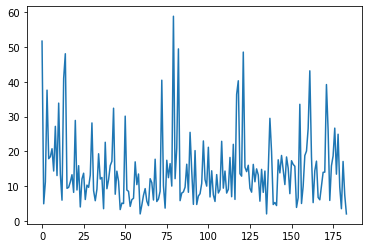

In [248]:
import matplotlib.pyplot as plt
plt.plot( day10_valid_data )
plt.show()